<a href="https://colab.research.google.com/github/Elixirman/Blackbox/blob/main/CNN_4_Binary_Image_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step-1: Installation & Setup

In [ ]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Install TensorFlow
"""
!pip install -q tensorflow-gpu

- Command executed on cmd
"""

'\n!pip install -q tensorflow-gpu\n\n- Command executed on cmd\n'

In [ ]:
import tensorflow as tf

print(tf.__version__)

2.11.0


# Step-2: Data Preprocessing

## Data and Library Importation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Install Kaggle API

In [ ]:
!pip install -q kaggle

Create a Directory as kaggle

In [ ]:
! mkdir -p ~/.kaggle

Import API key to Colab

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


Copy API key to Kaggle Directory

In [ ]:
! cp kaggle.json ~/.kaggle/

Disable API key

In [ ]:
! chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!mkdir -p ~/.kaggle && cp kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

 Check list of dataset

In [ ]:
! kaggle datasets list

ref                                                           title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ---------------------------------------------  ----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                         Spotify and Youtube                             9MB  2023-03-20 15:43:25           1109         40  1.0              
dgoenrique/netflix-movies-and-tv-shows                        Netflix Movies and TV Shows                     2MB  2023-03-13 18:49:00            800         27  1.0              
rajkumarpandey02/list-of-countries-by-gdp-sector-composition  List of Countries by GDP Sector Composition     8KB  2023-03-20 04:42:10           1008         35  1.0              
datascientistanna/customers-dataset                           Shop Customer Data                    

Importing Dataset

In [ ]:
# Copy API command from (https://www.kaggle.com/datasets/tongpython/cat-and-dog)

! kaggle datasets download -d tongpython/cat-and-dog

cat-and-dog.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# We need to unzip, "cat-and-dogs.zip"

! unzip -q /content/cat-and-dog.zip

replace test_set/test_set/cats/_DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace test_set/test_set/cats/cat.4001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace test_set/test_set/cats/cat.4002.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace test_set/test_set/cats/cat.4003.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
replace test_set/test_set/cats/cat.4004.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
replace test_set/test_set/cats/cat.4005.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
replace test_set/test_set/cats/cat.4006.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


# Step-3: Model Building

Initializing The CNN

In [ ]:
# Create an instance of the class

model = tf.keras.models.Sequential()

Establishing the input layer

In [ ]:
# Adding 1st CNN Layer
"""
1. Filters (kernel) = 64
2. kernel_size = 3
3. padding = same
4. Activation function = relu
5. input_shape = (32,32,3)
"""
model.add(tf.keras.layers.Conv2D(filters= 64, kernel_size= 3, padding= "same", activation= "relu",input_shape= [32, 32, 3] ))

In [ ]:
# Specify maxpool layer parameters
"""
1. pool_size = 2
2. strides = 2
3. padding = valid
"""
model.add(tf.keras.layers.MaxPool2D(pool_size= (2,2), strides= 2, padding= "valid"))

In [ ]:
# Adding 2nd CNN layer and maxpool layer
"""
1. Filters (kernel) = 32
2. kernel_size = 3
3. padding = same
4. Activation function = ReLU
"""
model.add(tf.keras.layers.Conv2D(filters= 64, kernel_size= 3, padding= "same", activation= "relu"))

# Specify maxpool layer parameters
"""
1. pool_size = 2
2. strides = 2
3. padding = valid
"""
model.add(tf.keras.layers.MaxPool2D(pool_size= (2,2), strides= 2, padding= "valid"))

In [ ]:
# Adding the Flattening layer

model.add(tf.keras.layers.Flatten())

In [ ]:
# Adding the dropout layer

model.add(tf.keras.layers.Dropout(0.4))

In [ ]:
# Adding fully connected layer // 1st Dense layer

model.add(tf.keras.layers.Dense(units= 128, activation= "relu"))

In [ ]:
# Adding 2nd Dense layer = Output Layer
"""
Units= 1 because of it binary objective
"""

model.add(tf.keras.layers.Dense(units= 1, activation= "sigmoid"))

Model Summary

In [ ]:
# Model Summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dropout (Dropout)           (None, 4096)              0

Model Compilation

In [ ]:
# Model Compilation

model.compile(loss= "binary_crossentropy", optimizer= "adam", metrics= ["accuracy"] )

# Step-4: Model Training (CNN Image Fitting)

In [ ]:
# Import a class

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define variables for dataset directory

test_data= "/content/test_set/test_set"
train_data = "/content/training_set/training_set"

Image Rescaling

In [ ]:
# Define an object // Create an instance

dataGen = ImageDataGenerator(rescale= 1./255)

In [ ]:
# define training & test set

train_set = dataGen.flow_from_directory(directory= train_data, target_size= (32,32), classes= ["dogs", "cats"], class_mode= "binary", batch_size= 20)

test_set = dataGen.flow_from_directory(directory= test_data, target_size= (32,32), classes= ["dogs", "cats"], class_mode= "binary", batch_size= 20)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [ ]:
# preview length of train and test set

len(train_set), len(test_set)

(401, 102)

Train The Model

In [ ]:
history = model.fit_generator(generator= train_set, steps_per_epoch=401, epochs= 20, validation_data= test_set, validation_steps= 102)

Epoch 1/20


<ipython-input-31-3a48cd933a4e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator= train_set, steps_per_epoch=401, epochs= 20, validation_data= test_set, validation_steps= 102)


401/401 [==============================] - 65s 162ms/step - loss: 0.2805 - accuracy: 0.8793 - val_loss: 0.4942 - val_accuracy: 0.7810
Epoch 2/20
401/401 [==============================] - 65s 163ms/step - loss: 0.2689 - accuracy: 0.8869 - val_loss: 0.5192 - val_accuracy: 0.7776
Epoch 3/20
401/401 [==============================] - 65s 162ms/step - loss: 0.2591 - accuracy: 0.8882 - val_loss: 0.4902 - val_accuracy: 0.7909
Epoch 4/20
401/401 [==============================] - 65s 163ms/step - loss: 0.2534 - accuracy: 0.8949 - val_loss: 0.4978 - val_accuracy: 0.7958
Epoch 5/20
401/401 [==============================] - 65s 163ms/step - loss: 0.2528 - accuracy: 0.8918 - val_loss: 0.4794 - val_accuracy: 0.7909
Epoch 6/20
401/401 [==============================] - 65s 162ms/step - loss: 0.2479 - accuracy: 0.8969 - val_loss: 0.5355 - val_accuracy: 0.7929
Epoch 7/20
401/401 [==============================] - 65s 162ms/step - loss: 0.2335 - accuracy: 0.9041 - val_loss: 0.5499 - val_accuracy: 0.7

In [ ]:
# Accuracy 93% greater than Val_accuracy - 78%
"""
Model has learnt too much and is overfitted
"""

# Step-5: Learning Curve Plot

In [ ]:
# Define a function

def learning_curve(history, epoch):

# Training vs validation accuracy

  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history["accuracy"])
  plt.plot(epoch_range, history.history["val_accuracy"])
  plt.title("Model Accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("epoch")
  plt.legend(["Train", "val"], loc="upper left")
  plt.show()

  # Training vs validation loss

  plt.plot(epoch_range, history.history["loss"])
  plt.plot(epoch_range, history.history["val_loss"])
  plt.title("Model Loss")
  plt.ylabel("Loss")
  plt.xlabel("epoch")
  plt.legend(["Train", "val"], loc="upper left")
  plt.show()

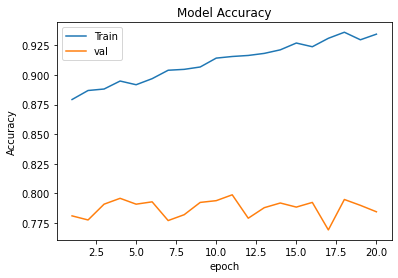

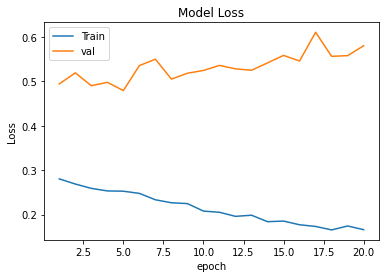

In [ ]:
learning_curve(history, epoch= 20)